In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/email_spam.csv', encoding="Windows-1252")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1)

In [5]:
data.columns = ['Label', 'Message']

In [6]:
data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Label', ylabel='count'>

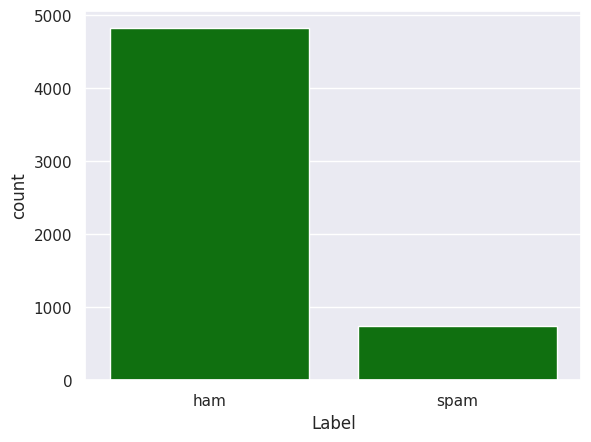

In [7]:
sns.set_theme()
sns.countplot(data, x = 'Label', color = 'green')

### ***Data Preprocessing***

---



---



In [8]:
stem = PorterStemmer()

In [9]:
corpus = []

for i in range(0, len(data)):
  a = re.sub('[^a-zA-z]', ' ', data['Message'][i])
  a = a.lower()
  a = a.split()
  a = [stem.stem(word) for word in a if not word in stopwords.words('english')]
  a = ' '.join(a)
  corpus.append(a)

In [10]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### ***BOW***

In [11]:
vector = CountVectorizer(max_features= 2500, ngram_range=(1, 2))

In [12]:
### INDEPENDENT FEATURE

X = vector.fit_transform(corpus).toarray()

In [13]:
vector.vocabulary_

{'go': 786,
 'point': 1621,
 'crazi': 447,
 'avail': 111,
 'bugi': 234,
 'great': 852,
 'world': 2443,
 'la': 1102,
 'cine': 351,
 'got': 834,
 'wat': 2357,
 'ok': 1460,
 'lar': 1113,
 'joke': 1072,
 'wif': 2409,
 'oni': 1483,
 'ok lar': 1463,
 'free': 717,
 'entri': 620,
 'wkli': 2433,
 'comp': 399,
 'win': 2414,
 'cup': 464,
 'final': 685,
 'st': 2021,
 'may': 1264,
 'text': 2124,
 'receiv': 1741,
 'question': 1696,
 'std': 2034,
 'txt': 2234,
 'rate': 1711,
 'appli': 75,
 'free entri': 722,
 'entri wkli': 622,
 'std txt': 2035,
 'txt rate': 2240,
 'rate appli': 1713,
 'dun': 581,
 'say': 1850,
 'earli': 587,
 'alreadi': 48,
 'nah': 1371,
 'think': 2144,
 'goe': 809,
 'usf': 2300,
 'live': 1177,
 'around': 87,
 'though': 2152,
 'freemsg': 729,
 'hey': 936,
 'darl': 490,
 'week': 2377,
 'word': 2439,
 'back': 128,
 'like': 1163,
 'fun': 745,
 'still': 2037,
 'tb': 2104,
 'xxx': 2469,
 'send': 1888,
 'rcv': 1719,
 'even': 630,
 'brother': 222,
 'speak': 2005,
 'treat': 2211,
 'per': 15

### ***Data Split***

In [14]:
data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
y = data['Label']

In [19]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2 )

In [20]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### ***Encoding***

In [27]:
y_train  = pd.get_dummies(y_train, dtype= int)

In [31]:
y_train.drop('ham', axis =1,  inplace = True)

In [32]:
y_train

,spam
3907,0
175,0
5314,1
3174,1
3447,0
...,...
87,0
1421,0
627,0
332,1


In [36]:
y_test = pd.get_dummies(y_test, dtype = int)

In [38]:
y_test.drop('ham', axis =1,  inplace = True)

In [39]:
y_test

,spam
558,0
4531,0
2184,0
3236,0
1497,0
...,...
5013,0
5024,0
2038,0
2863,0


### ***Model Training***

In [40]:
models = [ RandomForestClassifier(), MultinomialNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), LogisticRegression() ]

for model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(model, '\nConfusion matrix \n', confusion_matrix(y_pred,y_test))
  print('Score' , accuracy_score(y_pred,y_test))
  print('Report', classification_report(y_pred,y_test))
  print('--------------------------------------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier() 
Confusion matrix 
 [[965  18]
 [  0 132]]
Score 0.9838565022421525
Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99       983
           1       0.88      1.00      0.94       132

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115

--------------------------------------------------
MultinomialNB() 
Confusion matrix 
 [[957   9]
 [  8 141]]
Score 0.9847533632286996
Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier() 
Confusion matrix 
 [[965  75]
 [  0  75]]
Score 0.9327354260089686
Report               precision    recall  f1-score   support

           0       1.00      0.93      0.96      1040
           1       0.50      1.00      0.67        75

    accuracy                           0.93      1115
   macro avg       0.75      0.96      0.81      1115
weighted avg       0.97      0.93      0.94      1115

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC() 
Confusion matrix 
 [[965  15]
 [  0 135]]
Score 0.9865470852017937
Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.90      1.00      0.95       135

    accuracy                           0.99      1115
   macro avg       0.95      0.99      0.97      1115
weighted avg       0.99      0.99      0.99      1115

--------------------------------------------------
DecisionTreeClassifier() 
Confusion matrix 
 [[956  12]
 [  9 138]]
Score 0.9811659192825112
Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.92      0.94      0.93       147

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression() 
Confusion matrix 
 [[964  18]
 [  1 132]]
Score 0.9829596412556054
Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99       982
           1       0.88      0.99      0.93       133

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------
